To note:

- No idea what b is 
- Below is a couple of definitions from the GitHub page which might come in handy

Link travel time = free flow time * ( 1 + B * (flow/capacity)^Power ).
Link generalized cost = Link travel time + toll_factor * toll + distance_factor * distance

# Setup: import packages

In [1]:
#install packages if required
#%pip install networkx

In [2]:
#import packages 
import os
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import graphviz
import scipy.integrate as integrate 
from scipy.optimize import minimize_scalar
from scipy.misc import derivative
import numpy as np
import os
from random import *

In [3]:
#create cities dictionary
def make_dict(cities):
    cities_dict = {}
    for city in cities:
        link_file_path = data_path + city + '/' + city + '_net.tntp.txt'
        node_file_path = data_path + city + '/' + city +'_nodes.tntp.txt'
        trip_file_path = data_path + city + '/' + city + '_trips.tntp.txt'
        cities_dict[city] = {}
        to_add = {'link_file_path': link_file_path, 'node_file_path': node_file_path, 'trip_file_path': trip_file_path}
        cities_dict[city]['file_paths'] = to_add 
    return cities_dict

# Set file paths and city

In [4]:
data_path = '/Users/benseimon/Documents/Barca GSE/Studies/Term 2/Networks/Term Paper/Networks_Term_Paper/Data/'
cities = ['ChicagoSketch']
data_path = data_path 
os.chdir(data_path)

# Import required classes

In [5]:
classes_path = '/Users/benseimon/Documents/Barca GSE/Studies/Term 2/Networks/Term Paper/Networks_Term_Paper/Code/Python/working_multiple_eq_flow/' + cities[0] + '/' + 'pytrans_working_multiple_eq_flow'
#network_analysis_path_niamh = r'C:\Users\35387\OneDrive\Documents\Networks\New folder\Networks_Term_Paper\pytrans_UrbanNetworkAnalysis\pytrans\UrbanNetworkAnalysis\original_edited'
os.chdir(classes_path)
import Frank_Wolfe
import TransportationNetworks as tn
import visualize_graph
import custom_class

# Make dict

In [6]:
cities_dict = make_dict(cities)
cities_dict

{'ChicagoSketch': {'file_paths': {'link_file_path': '/Users/benseimon/Documents/Barca GSE/Studies/Term 2/Networks/Term Paper/Networks_Term_Paper/Data/ChicagoSketch/ChicagoSketch_net.tntp.txt',
   'node_file_path': '/Users/benseimon/Documents/Barca GSE/Studies/Term 2/Networks/Term Paper/Networks_Term_Paper/Data/ChicagoSketch/ChicagoSketch_nodes.tntp.txt',
   'trip_file_path': '/Users/benseimon/Documents/Barca GSE/Studies/Term 2/Networks/Term Paper/Networks_Term_Paper/Data/ChicagoSketch/ChicagoSketch_trips.tntp.txt'}}}

# instantiate class

In [7]:
#instantiate class 
trial_run = custom_class.fw_custom_algorithm(cities_dict)

# Observe one city

In [8]:
#set city for investigation
city = cities[0]

In [9]:
trial_run.create_links_csv()
cities_dict[city]['csv']

,init_node,term_node,capacity,length,free_flow_time,b,power,speed,toll,link_type
0,1,547,49500,0.86267,0.00,0.15,4,0,0,3
1,2,548,49500,0.86267,0.00,0.15,4,0,0,3
2,3,549,49500,0.86267,0.00,0.15,4,0,0,3
3,4,550,49500,0.86267,0.00,0.15,4,0,0,3
4,5,551,49500,0.86267,0.00,0.15,4,0,0,3
...,...,...,...,...,...,...,...,...,...,...
2945,931,906,500,22.65430,14.78,0.15,4,0,0,1
2946,932,386,49500,0.86267,0.00,0.15,4,0,0,3
2947,932,515,5000,10.44260,5.93,0.15,4,0,0,2
2948,933,387,49500,0.86267,0.00,0.15,4,0,0,3


# Plot graph

Total number of nodes in ChicagoSketch: 933
Total number of edges in ChicagoSketch: 2950
Graph for: ChicagoSketch


AttributeError: module 'scipy.sparse' has no attribute 'coo_array'

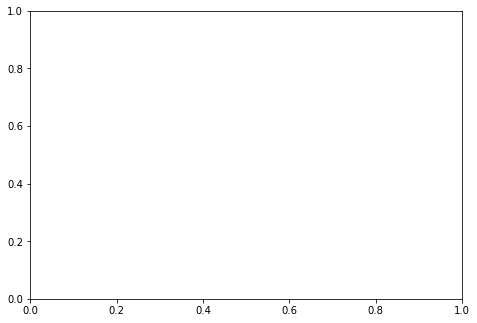

In [10]:
#Create csvs, plot graph and show summary stats
trial_run.summary_stats_all()
trial_run.plot(city)

# Observe example network data

In [ ]:
#observe network with all links
remove_link = 0 #0 is equivalent to no links closed
trial_run.make_network(city, remove_link)
trial_run.network_attributes(city, remove_link)

In [ ]:
#observe network after removing one link
remove_link = 1
trial_run.make_network(city, remove_link)
trial_run.network_attributes(city, remove_link)

# Compute equilibrium flow for example city using Frank-Wolfe algorithm

In [ ]:
#compute the eq flow for one example city and no closed links
remove_link = 0
trial_run.compute_link_flow(city, remove_link)

In [ ]:
#report eq flow for one example city and no closed links
print('Results for:', city)
trial_run.cities_dict[city][str(remove_link)]['fw_run'].showODFlow() #equilibrium flows
trial_run.cities_dict[city][str(remove_link)]['fw_run'].showODFlowMap() #flow map

# Compute equilibrium flow for one closed link in example city using Frank-Wolfe algorithm

In [ ]:
#compute the eq flow for one example city and one closed link
remove_link = 1
trial_run.compute_link_flow(city, remove_link)

In [ ]:
#report eq flow for one example city and one closed links
print('Results for:', city)
trial_run.cities_dict[city][str(remove_link)]['fw_run'].showODFlow() #equilibrium flows
trial_run.cities_dict[city][str(remove_link)]['fw_run'].showODFlowMap() #flow map

# Systematically close each link and compute equilibrium flow for example city

In [ ]:
#need to make the network where each link is shut first
trial_run.make_network_shut_each_link(city)

In [ ]:
#view a network with edge removed
removed_link = 8
trial_run.make_network(city, removed_link)
trial_run.network_attributes(city, removed_link)

In [ ]:
trial_run.eq_flow_shut_each_link(city)

In [ ]:
#report eq flow for one example city and one randomly closed link (flex removed_link, but can't choose more than max edges)
max_edges = len(cities_dict[city]['0']['network'].graph.edges)
print('max_edges:', max_edges)
removed_link = 1
print('Equilibrium flow for removed link number',removed_link, 'in', city)
print('Results for:', city)
trial_run.cities_dict[city][str(removed_link)]['fw_run'].showODFlow() #equilibrium flows
trial_run.cities_dict[city][str(removed_link)]['fw_run'].showODFlowMap() #flow map

In [ ]:
## for below analysis, remember that the removed_link = 1 means the last row in the trip file is removed. 
# Removed_link = 2 means the second last row is removed, and so on.
# You can use this for the mapping from fw eq flow results to the csv/dataframe.


removed_link = 0
#density
nx.density(cities_dict[city][str(remove_link)]['network'].graph)

#diameter
nx.diameter(cities_dict[city][str(remove_link)]['network'].graph)

#check this out for centrality https://networkx.org/documentation/stable/reference/algorithms/centrality.html

#betweeness origin

#eigenvector origin

#betweeness destination

#eigenvector destination

#flow - from initial trips file i think 

#cost - will need to compute